# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

You have two days to do this study

In [241]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
import squarify
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('marketing_campaign.txt', sep="\t")
raw_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [396]:
raw_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [3]:
#Recence 
from datetime import datetime
raw_data['Dt_Customer'] = raw_data['Dt_Customer'].apply(pd.to_datetime)

# EDA

In [123]:
raw_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
# drop columns Z_CostContact & Z_Revenue
raw_data.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)
# Marital_Status

# drop some values (2 YOLO / 2 ABSURD / 3 ALONE)
values = ['YOLO', 'Absurd']
raw_data = raw_data[raw_data.Marital_Status.isin(values) == False]

# replace statut ALONE by SINGLE
raw_data = raw_data.replace(['Alone'],'Single')

In [6]:
#Outliers income
maxtresh = raw_data['Income'].quantile(0.95)
maxtresh


84140.4

In [7]:
raw_data = raw_data[raw_data["Income"] < maxtresh]

raw_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


# RFM preparation

In [8]:
RFM_prep = raw_data[['ID','Recency','NumDealsPurchases','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]



In [9]:
RFM_prep['Frequency'] = RFM_prep['NumWebPurchases']+RFM_prep['NumCatalogPurchases']+RFM_prep['NumStorePurchases']

In [10]:
RFM_prep['Monetary'] =  RFM_prep['MntFishProducts']+RFM_prep['MntFruits']+RFM_prep['MntWines']+RFM_prep['MntSweetProducts']+RFM_prep['MntGoldProds']+RFM_prep['MntMeatProducts']

In [11]:
RFM = RFM_prep[['ID','Recency','Frequency','Monetary']]

In [12]:
RFM['Recency'].describe()

count    2101.000000
mean       49.010947
std        28.845588
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [13]:
RFM['Frequency'].describe()


count    2101.000000
mean       12.188958
std         7.090301
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: Frequency, dtype: float64

In [133]:
RFM['Monetary'].describe()

count    2101.000000
mean      558.494526
std       566.166643
min         5.000000
25%        66.000000
50%       331.000000
75%       973.000000
max      2486.000000
Name: Monetary, dtype: float64

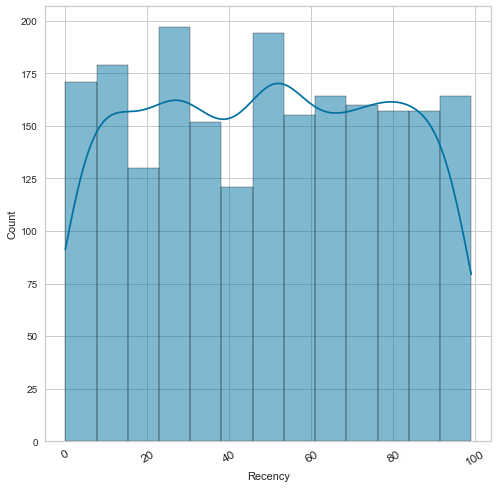

In [389]:
fig, axs = plt.subplots(figsize=(8, 8)) #size plot

sns.histplot(data= RFM, x= "Recency",
          kde=True)
plt.xticks(fontsize=12, rotation=30)
plt.show()

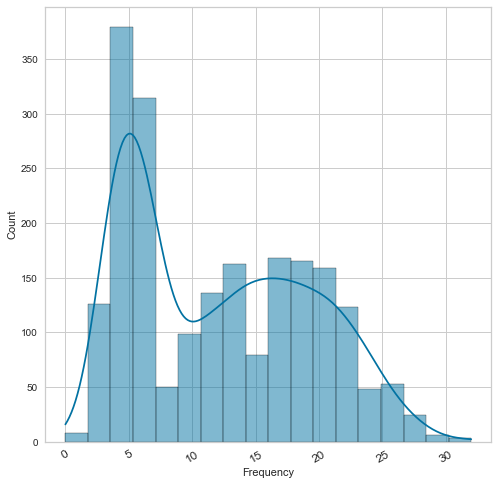

In [390]:
fig, axs = plt.subplots(figsize=(8, 8)) #size plot

sns.histplot(data= RFM, x= "Frequency",
          kde=True)
plt.xticks(fontsize=12, rotation=30)
plt.show()

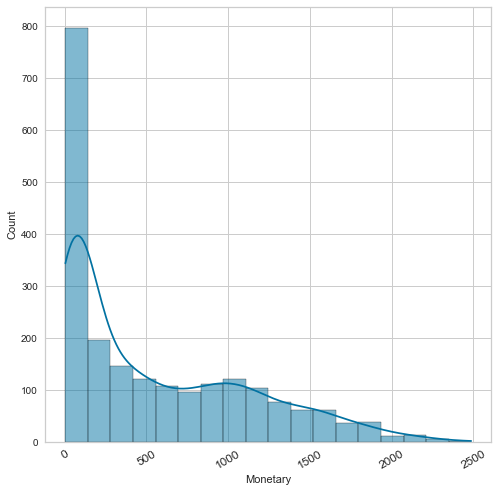

In [391]:
fig, axs = plt.subplots(figsize=(8, 8)) #size plot

sns.histplot(data= RFM, x= "Monetary",
          kde=True)
plt.xticks(fontsize=12, rotation=30)
plt.show()

# RFM ROLE DISTRIBUTION

In [26]:
RFM

,ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2235,10870,46,16,1341
2236,4001,56,15,444
2237,7270,91,18,1241
2238,8235,8,21,843


In [400]:
###Calculating quantile values
quintiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]).to_dict()
###Benchmark to give score for recency indicator
def r_score(x):
    if x <= quintiles['Recency'][.3]:
        return 3
    elif x <= quintiles['Recency'][.6]:
        return 2
    else:
        return 1

In [401]:
def f_score (x):
    if x <= quintiles['Frequency'][.2]:
        return 1
    elif x <= quintiles['Frequency'][.8]:
        return 2
    else:
        return 3

In [402]:
def m_score (x):
    if x <= quintiles['Monetary'][.2]:
        return 1
    elif x >= quintiles['Monetary'][.7]:
        return 3
    else:
        return 2

In [403]:
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: f_score(x))
RFM['M'] = RFM['Monetary'].apply(lambda x: m_score(x))


In [404]:
RFM['RFM Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM.head()

,ID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,5524,58,22,1617,2,3,3,233
1,2174,38,4,27,2,1,1,211
2,4141,26,20,776,3,3,2,332
3,6182,26,6,53,3,2,1,321
4,5324,94,14,422,1,2,2,122


In [377]:
RFM['RFM Score'].value_counts()

122    337
322    264
222    251
133    144
111    143
211    125
311    121
123    119
233    109
333     97
323     84
223     78
112     52
312     42
212     30
332     30
132     24
121     17
221     15
232     12
321      7
Name: RFM Score, dtype: int64

In [378]:
def categ(x):
    if x in["333"]:
        return "Champions"
    elif x in["113", "213"]:
        return "Few time Big"
    elif x in["233", "322","222","232"]:
         return "Active good buyer"
    elif x in["231"]:
        return "Active cheap buyer"
    elif x in["133"]:
         return "Seeping good"
    elif x in["131","122"]:
         return "Sleeping cheap"
    elif x in["132"]:
         return "Sleeping Average" 
    elif x in["321","331","312"]:
        return "Tourist"
    elif x in["221","331"]:
        return "Looking for promotions"
    elif x in["332"]:
        return "Loyal Customer"
    elif x in['121']:
        return "Lost Cheap"
    elif x in["123"]:
        return "Lost good"
    elif x in["112"]:
        return "Lost tourist"
    elif x in['111','211', "311"]:
        return "Did he ever buy? "
   
    else:
        return "Lambda"

In [379]:
RFM['Category'] = RFM['RFM Score'].apply(lambda x: categ(x))

In [380]:
RFM['Category'].value_counts()

Active good buyer         636
Did he ever buy?          389
Sleeping cheap            337
Lambda                    192
Seeping good              144
Lost good                 119
Champions                  97
Lost tourist               52
Tourist                    49
Loyal Customer             30
Sleeping Average           24
Lost Cheap                 17
Looking for promotions     15
Name: Category, dtype: int64

# RFM VISUALISATION

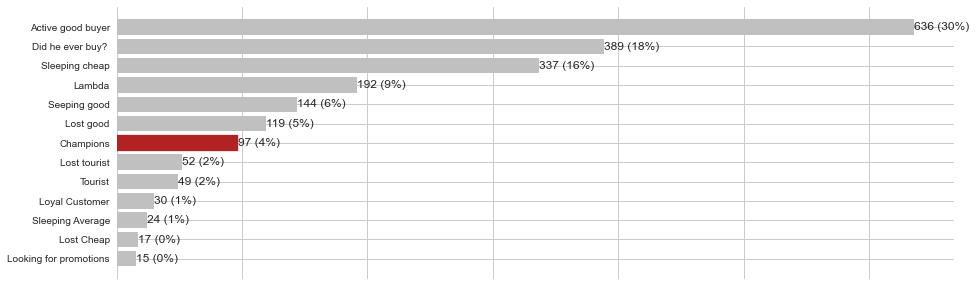

In [387]:
# count the number of customers in each segment
categ_counts = RFM['Category'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(categ_counts)),
              categ_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(categ_counts)))
ax.set_yticklabels(categ_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if categ_counts.index[i] in ['Champions']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/categ_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

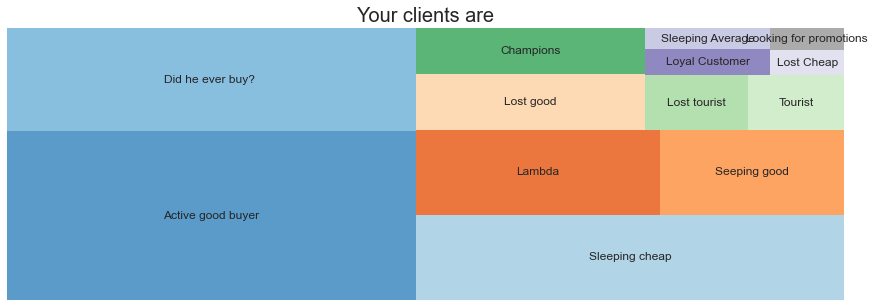

In [394]:
# visualisation squarify
y = RFM['Category'].value_counts()
plt.rcParams['figure.figsize'] = (15, 5)
color = plt.cm.tab20c(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Your clients are', fontsize = 20)
plt.axis('off')
plt.show()

# Conlusions

In [395]:
RFM['Category'].value_counts(normalize=True)

Active good buyer         0.302713
Did he ever buy?          0.185150
Sleeping cheap            0.160400
Lambda                    0.091385
Seeping good              0.068539
Lost good                 0.056640
Champions                 0.046168
Lost tourist              0.024750
Tourist                   0.023322
Loyal Customer            0.014279
Sleeping Average          0.011423
Lost Cheap                0.008091
Looking for promotions    0.007139
Name: Category, dtype: float64

Conclusions were done using PowerBI

But I managed to sort different category of customers. 

# BACK UP FOR RFM SEGMENTATION

In [409]:
#RFM = RFM[['ID','Recency','Frequency','Monetary']]